이번 장에서는 신경망(딥러닝) 학습의 효율과 정확도를 높일 수 있는 다음과 같은 기법들에 대해 알아본다.
1. 신경망 학습에서 중요한 주제인 가중치 매개변수의 최적값을 탐색하는 최적화 방법, 가중치 매개변수 초깃값, 하이퍼파라미터 설정 방법을 다룬다.
2. 오버피팅의 대응책인 가중치 감소와 드롭아웃 등의 정규화 방법을 설명하고 구현한다.
3. 배치 정규화를 알아본다.  
　  
   
## 6.1 매개변수 갱신
신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이며 이를 **최적화(optimization)**이라고 한다. 지금까지 매개변수의 기울기를 찾고 그 방향을 이용해 매개변수 값을 갱신하는 일을 반복해 최적값에 다가갔다. 이를 **확률적 경사 하강법(stochastic gradient descent; SGD)**이라고 한다. 지금부터는 SGD의 단점을 알아보고 또 다른 최적화 기법을 살펴보자.  
　  
   
### 6.1.1 확률적 경사 하강법(SGD)
SGD의 전략은 지금 서 있는 장소에서 가장 크게 기울어진 방향으로 가는 것이다. 우선 SGD는 수식으로 다음과 같이 쓸 수 있다.  

\begin{equation}
W \leftarrow W - \eta \frac{\partial L}{\partial W}
\end{equation}  
  
여기서 $W$는 갱신하고자 하는 매개변수고, $\frac{\partial L}{\partial W}$은 $W$에 대한 손실 함수의 기울기다. $\eta$는 학습률(learning rate)을 의미하는데, 실제로는 $0.01$이나 $0.001$과 같은 값을 미리 정해서 사용한다. 식 (1)에서 보듯 SGD는 기울어진 방향으로 일정 거리만 가는 단순한 방법이다. 이를 구현하면 다음과 같다.

In [1]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            param[key] -= self.lr * gradss[key]

　  
### 6.1.2 SGD의 단점
SGD는 단순하고 구현도 쉽지만, 비효율적일 때가 있다. 먼저 다음 함수의 최솟값을 구하는 문제를 살펴보자.  

\begin{equation}
f(x,y) = \frac{1}{20}x^2 + y^2
\end{equation}  
  
식 (2)의 함수는 아래 그림의 왼쪽과 같이 생겼으며, 등고선은 오른쪽과 같이 $x$축 방향으로 늘인 타원 모양이다.  
  
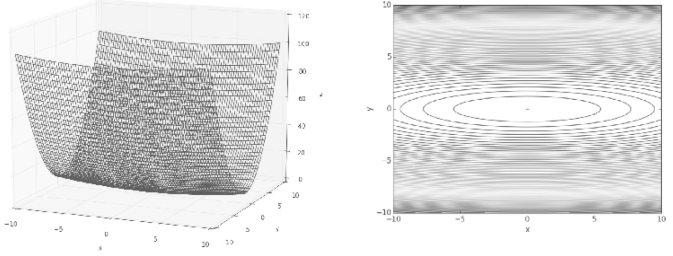  
　  
식 (2) 함수의 기울기를 그려보면 아래와 같이 된다. 이 기울기는 $y$축 방향은 크고, $x$축 방향은 작다는 특징을 가지며 최솟값이 되는 장소는 $(0,0)$이지만, 그림에서 보여주는 기울기 대부분은 $(0,0)$을 가르키지 않는다는 것에 주의해야 한다.  
　  
  
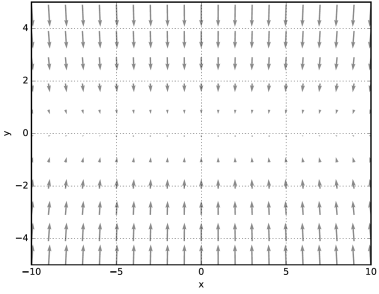  
　    
식 (2)의 함수에 초깃값을 $(-7.0, 2.0)$으로 하여 SGD를 적용해보면 아래 그림과 같은 결과가 나온다.  
  
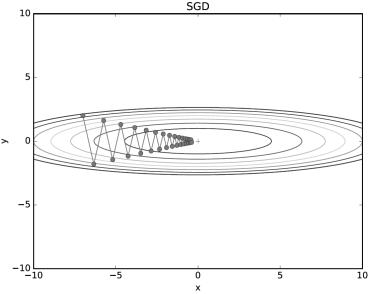  
　  
SGD는 심하게 굽어진 비효율적인 모습을 보인다. 즉, SGD의 단점은 비등방성(anisotropy) 함수(방향에 따라 성질이 달라지는 함수)에서는 탐색 경로가 비효율적이라는 것이다. 이럴 때는 SGD 같이 기울어진 방향으로만 진행하는 단순한 방법보다 다른 방법을 사용하는 것이 효율적이다. 또한, SGD가 지그재그로 탐색하는 기본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리키기 때문이라는 점을 생각해볼 필요가 있다.  
  
이러한 SGD의 단점을 개선한 모멘텀(Momentum), AdaGrad, Adam 이라는 세 방법을 공부하고 구현해보자.  
  
　  
### 6.1.3 모멘텀(Momentum)
이전 그레디언트가 얼마인지 고려하지 않는 SGD는 그레디언트가 작은 부분에서 갱신이 매우 느리게 이루어진다. 반대로 모멘텀은 이전 그레디언트가 얼마였는지가 중요하다. 여기서는 매 반복에서 그레디언트를 구하고 이를 모멘텀 벡터 $v$에 더한 값을 빼서 가중치를 갱신하게 된다. 모멘텀의 수식은 다음과 같다.  

\begin{align}
\begin{aligned}
v \leftarrow \alpha v - \eta \frac{\partial L}{\partial W} \\
W \leftarrow W + v
\end{aligned}
\end{align}  
  
SGD와 달리 $v$라는 변수가 나오는데, 이는 물리에서 말하는 속도(velocity)에 해당한다. 즉, 식(3)은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타낸다. 또한, $\alpha v$는 물리에서의 지면 마찰이나 공기 저항에 해당하는 항으로 물체가 아무런 힘을 받지 않았을 때 서서히 하강시키는 역할, 너무 빠르게 내려가지 않도록 하는 역할을 한다. 보통 $\alpha$는 $0.9$ 등의 값을 설정한다.